# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

### CORRELATING SKILL WITH SALARY 

The prediction of Salary structure in Human Resource department ( HR) of a company  contains two fold objectives: 

    -To  attract and retain the talented employees 
    -Show the door to the dead wood. 
    
The concept of demand and supply of work force  needs  to be examined. The key intakes in HR department include - identifying the responsibilities of each  job, appointing the right man to the right post  and evolving a salary package that suits the best in the industry,  based on parameters like qualifications, industry, job location.  This is vital to the HR department as it helps the company in reducing the unnecessary cost while retaining the best talent. 

On the other hand, Salary prediction can also help the job seekers. It helps job seekers to  take more informed decisions and update their skills/knowledge to maximize salary.

**It is a win – win formula for both employers and job seekers.** 



In [1]:
#import libraries

#Analysis packages
import pandas as pd
import sklearn as sk
import numpy as np

#Visualization packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor


#your info here
__author__ = "Nallavelli Manasa"
__email__ = "manasa2093@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#loading the data into Pandas dataframe
test_features = pd.read_csv('............/data/test_features.csv')
train_features = pd.read_csv('.........../data/train_features.csv')
train_salaries = pd.read_csv('.........../data/train_salaries.csv')

In [3]:
#merging train_features and train_salary
df = train_features.merge(train_salaries, on='jobId', how='left')

In [4]:
df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [5]:
#test dataset
test_features.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


### ---- 3 Clean the data ----

In [6]:
#summary statistics for each varible 
df.describe(include='all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362684618630,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


In [7]:
#check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
#checking for duplicate data and removing it
df[df.duplicated()]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [10]:
#checking if we have any invalid data- salary < 0 
(df['salary'] <= 0).sum()

5

We have 5 rows where salary < 0, as we are predicting salary these rows are invalid. 

In [11]:
#removing salary < 0 
df.drop(df[df['salary'] <=0].index, inplace=True)

In [12]:
#checking if we removed salary <0
df.shape

(999995, 9)

It checks the unique values in each column and counts the repetitions. We can check for missing or incorrect values. 

The data is perfect, no missing or incorrect values.  

In [14]:
#checking for null values 
for i in df:
    print(i)
    print( pd.isnull(df[i]).value_counts())

jobId
False    999995
Name: jobId, dtype: int64
companyId
False    999995
Name: companyId, dtype: int64
jobType
False    999995
Name: jobType, dtype: int64
degree
False    999995
Name: degree, dtype: int64
major
False    999995
Name: major, dtype: int64
industry
False    999995
Name: industry, dtype: int64
yearsExperience
False    999995
Name: yearsExperience, dtype: int64
milesFromMetropolis
False    999995
Name: milesFromMetropolis, dtype: int64
salary
False    999995
Name: salary, dtype: int64


From above analysis, there are no null values in our dataset.


In [15]:
#checking for data types
df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

All datatypes correctly match the dtyes of columns, changing the data types is not required.

### ---- 4 Explore the data (EDA) ----

In [16]:
#checking salary distribution 
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


Salary is our target varibale.
Salary range from 17 to 301 with mean 116. We need to check for potential outliers.

In [17]:
#finding the 25th and 75th quantile of salary
Q1= df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3-Q1

In [18]:
#checking for outliers below 25th quantile
df[(df['salary'] < Q1 - (1.5*IQR))]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [19]:
salary_75th = df[(df['salary'] > (Q3 + (1.5*IQR)))]

There are jobs which are above the 75th quantile, we will check whether these jobs can be considered for further analysis.We will check the industry and experience to have a better idea.

In [20]:
salary_75th.groupby(df['jobType']).count()['salary']

jobType
CEO               3227
CFO               1496
CTO               1488
JUNIOR              20
MANAGER            217
SENIOR              66
VICE_PRESIDENT     603
Name: salary, dtype: int64

It is common to have high salaries for all job types mentioned above but we should further examine why Junior job type is having higher pay.

In [21]:
salary_75th[(salary_75th.jobType == "JUNIOR")]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


 We can include these in our analysis as it is expected to have masters/Doctoral to have higher pay. 

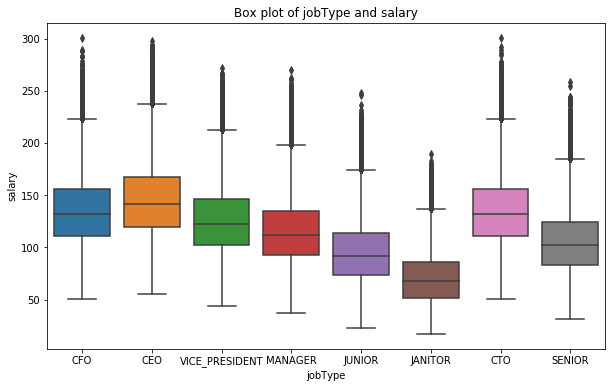

In [22]:
#interpreting Jobtype
fig = plt.figure(figsize=(10,6))
sns.boxplot(x= "jobType",y = "salary" , data=df)
plt.title('Box plot of jobType and salary')
plt.show()

CEO seems to have Higher pay and Janitor has low pay.


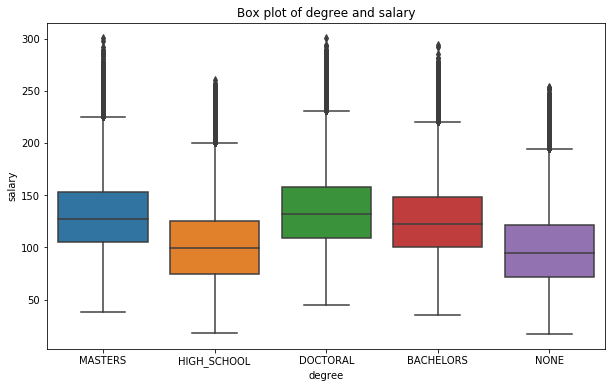

In [23]:
#interpreting degree
fig = plt.figure(figsize=(10,6))
sns.boxplot(x= "degree",y = "salary" , data=df)
plt.title('Box plot of degree and salary')
plt.show()

Masters and Doctoral degree have higher pay and people with "none" no degree tend to have relatively lesser pay. 

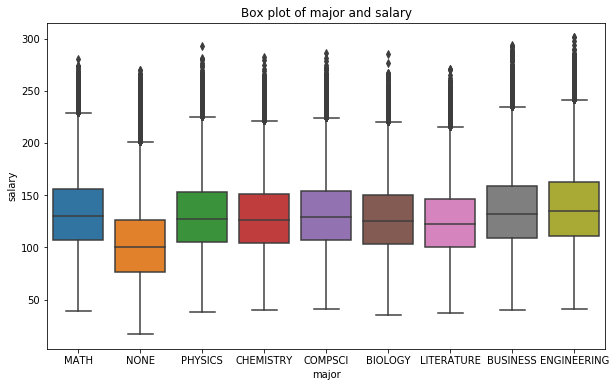

In [24]:
#interpreting major
fig = plt.figure(figsize=(10,6))
sns.boxplot(x= "major",y = "salary" , data=df)
plt.title('Box plot of major and salary')
plt.show()

Almost all majors seems to have same salary range, but again "none" major has lesser pay.

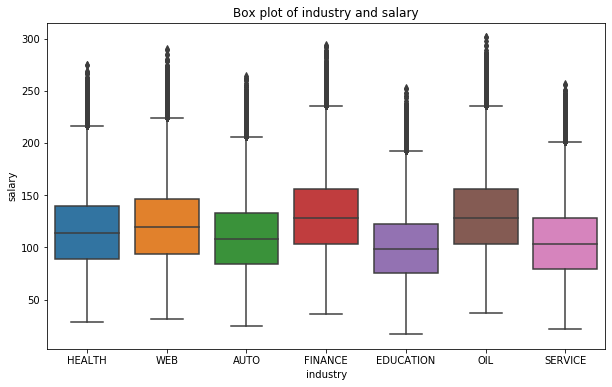

In [25]:
#interpreting industry
fig = plt.figure(figsize=(10,6))
sns.boxplot(x= "industry",y = "salary" , data=df)
plt.title('Box plot of industry and salary')
plt.show()

Finance and oil industry have higher salary, education industry seems to have less salary range.

Text(0, 0.5, 'Count')

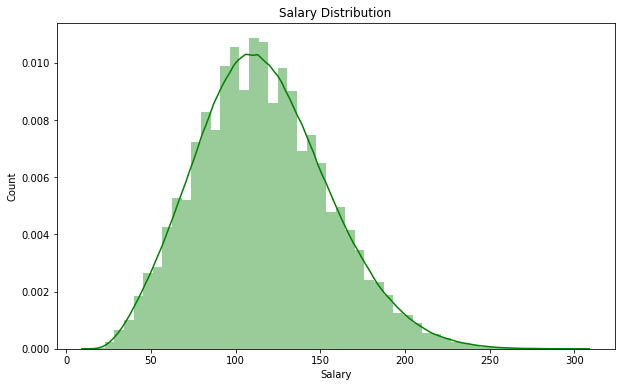

In [26]:
#interpreting salary
fig = plt.figure(figsize=(10,6))
sns.distplot(df.salary,  color="g")
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

We can infer that, those with highest degree and job type that is -  masters/doctoral degree with job type- CFO, CEO , CTO - have highest pay.
Lets check the salary range of these degrees and job types by dividing the salary range in 4 equal bins. 


In [27]:
#creating bins for salary 
bins = np.linspace(min(df["salary"]), max(df["salary"]), 5)
group = ['low', 'medium', 'high','maximum']
df['extra'] = pd.cut(df["salary"], bins, labels=group)

Text(0, 0.5, 'Count')

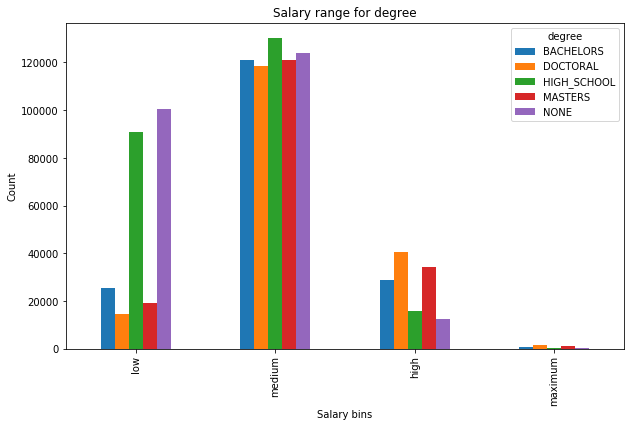

In [28]:
bins_degree = df.groupby('extra')['degree'].value_counts().unstack()
bins_degree.plot(kind='bar', figsize=(10, 6))
plt.title('Salary range for degree')
plt.xlabel('Salary bins')
plt.ylabel('Count')

Salary is divied in 4 bins, ranging from - 

17 to 88 as  "Low" 

88 to 159  as "Medium"

159 to 230 as "High"

230 and above as "Max"


It can be inferred that-

-Doctoral and Masters degree have salary ranging between 159 to 230. 

-Others with high school degree have salary ranging between 17 to 88. 


Text(0, 0.5, 'Count')

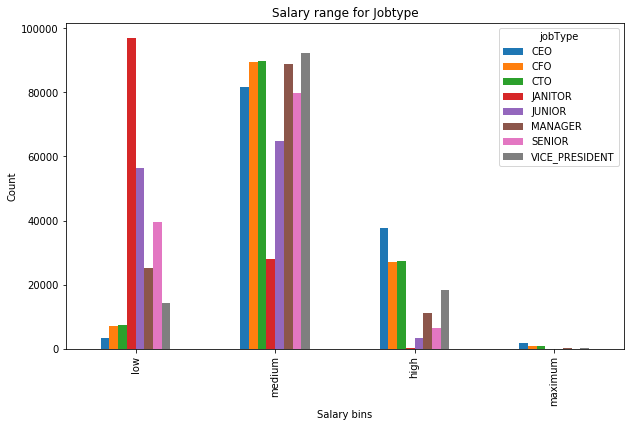

In [29]:
#jobtype and salary
bins_Jobtype = df.groupby('extra')['jobType'].value_counts().unstack()
bins_Jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Salary range for Jobtype')
plt.xlabel('Salary bins')
plt.ylabel('Count')

Similary, with jobtype- CFO, CEO, CTO and Vice president falls under highest category with 159 and more. 
jobtype - janitor has least salary ranging from 17 to 88. 



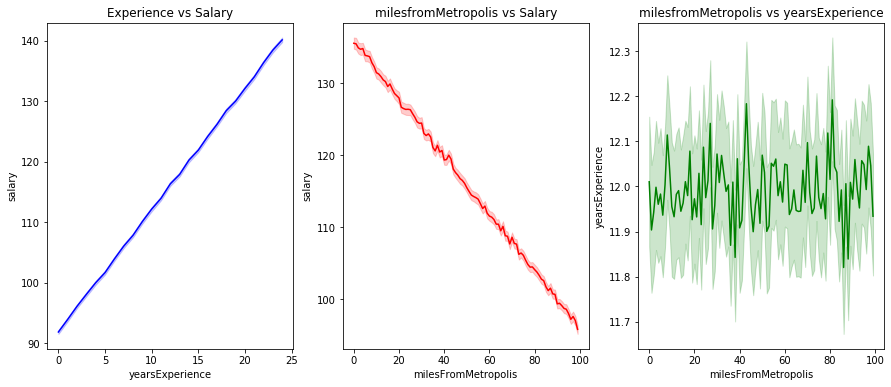

In [32]:
#comparing numeric varibles with salary
d, axes = plt.subplots(ncols=3, figsize=(15, 6))

ax = sns.lineplot(x='yearsExperience', y='salary', data=df,color='b',ax=axes[0])
ax.set_title('Experience vs Salary')

ax1 = sns.lineplot(x='milesFromMetropolis', y='salary', data=df, color="red",ax=axes[1])
ax1.set_title('milesfromMetropolis vs Salary')
fig.subplots_adjust(hspace=.12)


ax2 = sns.lineplot(x='milesFromMetropolis', y='yearsExperience', data=df, color="green",ax=axes[2])
ax2.set_title('milesfromMetropolis vs yearsExperience')
plt.show()

Positive correlation - Years of experience and  salary -There is increase in salary with experience. 

Negative correlation- miles from metropolis and salary -If miles increase , salary decreases. 

No linear correlation - Years of experience and miles from metropolis.

We have seen the salary ranges between-

1. jobtype and degree 
2. major and industry

Now, we will check for correlation between all varibales. 
For this purpose, we will convert all the categorical variables to numeric by replacing all varibales with the mean salary of subcategory of that column.

In [33]:
corr_dff = df.copy()

In [34]:
#convert the data type from object to category
corr_dff[['companyId','jobType','major','degree','industry']]=df[['companyId',
    'jobType','major','degree','industry']].astype('category')

In [35]:
#creating def function and replacing all varibles with that groups subcategory
col_means = ['companyId','jobType','major','degree','industry']

def to_num(col):
    for i in col:
        corr_dff[i] = corr_dff.groupby(i).transform('mean')['salary']

In [36]:
#calling the function to_num
to_num(col_means)

In [37]:
corr_dff = corr_dff.drop(columns=['extra','jobId'])

In [38]:
corr_dff.head(4)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142


In [39]:
#finding correlation
cor = corr_dff.corr()

In [40]:
cor

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
companyId,1.000000,0.005552,0.004423,0.004490,0.002042,0.001890,-0.002230,0.008498
jobType,0.005552,1.000000,0.288261,0.256843,0.002214,0.001118,0.000024,0.597463
degree,0.004423,0.288261,1.000000,0.853049,0.000870,0.000012,0.001978,0.401300
major,0.004490,0.256843,0.853049,1.000000,0.000367,-0.000129,0.001519,0.378675
industry,0.002042,0.002214,0.000870,0.000367,1.000000,0.000709,-0.001102,0.296626
yearsExperience,0.001890,0.001118,0.000012,-0.000129,0.000709,1.000000,0.000672,0.375013
milesFromMetropolis,-0.002230,0.000024,0.001978,0.001519,-0.001102,0.000672,1.000000,-0.297686
salary,0.008498,0.597463,0.401300,0.378675,0.296626,0.375013,-0.297686,1.000000


Text(0.5, 1, 'Correlation Matrix')

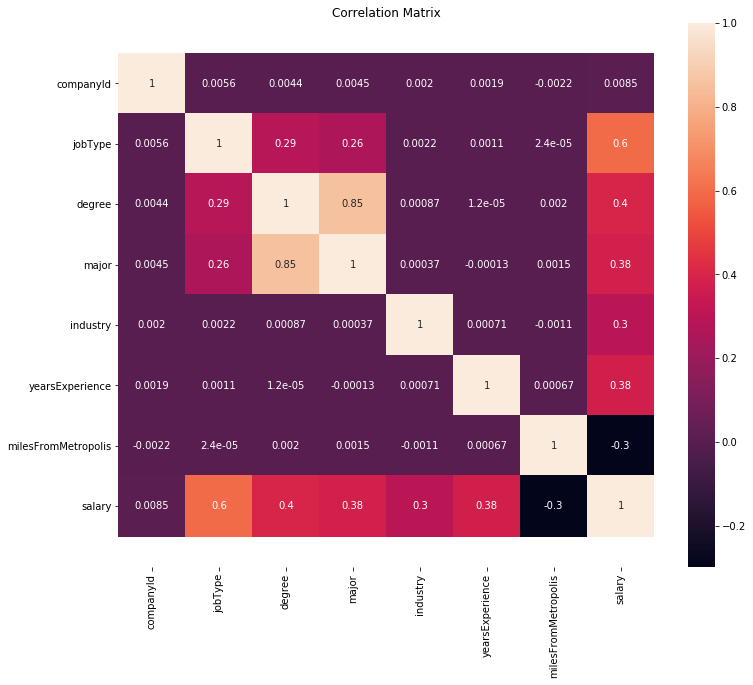

In [41]:
#plotting heatmap
plt.figure(figsize=(12,10))
ax = sns.heatmap(cor, xticklabels=cor.columns.values,yticklabels=cor.columns.values, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix')

Strong positive correlation - each of the variables - Jobtype, degree, major, industry, experience have 
positive correlation with salary(our target variable).

Negative correlation - exist between miles from metropolis and salary.

Weak correlation exists between company id and salary

### ---- 5 Establish a baseline ----

First, we create a simple baseline model and then try to compare our other model predictions with it to show how much they improve our baseline. 

For baseline - Most of the HR managers use industry mean to calculate the salary, so we will calculate the average salary per industry and then calculate  mean squared error.

In [42]:
avg_salary = pd.DataFrame(df['salary'].groupby(df.industry).mean())
predicted  = df.merge(avg_salary ,on='industry', how='inner')

In [43]:
#commuting the MSE manually 
mse_baseline = np.mean((predicted['salary_x']-predicted['salary_y'])**2)
print("The mean squared error for baseline is :", np.round(mse_baseline,3))

The mean squared error for baseline is : 1367.123


# Preparing data for analysis 

### ---- 6 Feature Engineering----

1.We need to scale data for yearsExperience and milesfromMetropolis.

2.Creating dummies for categorical variables- 'jobType','degree', 'major','industry'


In [44]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

df[['yearsExperience','milesFromMetropolis']] = mms.fit_transform(df[['yearsExperience','milesFromMetropolis']])

In [45]:
num_var = ['yearsExperience', 'milesFromMetropolis', 'salary']

cat_var = ['jobType','degree', 'major','industry']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.shape

(999995, 28)

In [46]:
new_df.head(3)

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,...,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis,salary
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0.416667,0.838384,130
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.125000,0.737374,101
2,0,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0.416667,0.383838,137


In [47]:
#normal x and y 
x_normal = new_df.iloc[:,:27]
y_normal = new_df.iloc[:,-1]

In [48]:
#train, test spilt 
x_train, x_test, y_train, y_test = train_test_split(x_normal,y_normal,test_size=0.3, random_state=0)
print("The number of samples in training are:" , x_train.shape)
print("The number of samples in testing are:" , x_test.shape)
print("The number of samples in training are:" , y_train.shape)
print("The number of samples in testing are:" , y_test.shape)

The number of samples in training are: (699996, 27)
The number of samples in testing are: (299999, 27)
The number of samples in training are: (699996,)
The number of samples in testing are: (299999,)


## Part 3 - DEVELOP

  ### ---- 7 Hypothesize solution----


 I would like to develop the following 3 models and select the best which gives the least mean square error. -

1. Linear Regression - It works well with large data,easy to understand and explain.
2. Random Forest - It is a combination of Decision trees that can be best modeled for prediction. It can handle large data sets.
3. Gradient Boosting - It trains many models in additive/sequential manner by converting weak learners into strong learners. 

GOAL- To find the best model that has mean square error below 360.

### ---- 8 Creating models----

# LINEAR REGRESSION

In [49]:
#fitting the regression model
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)

0.7439387881506949

In [50]:
#calculating the mean squared error (mse)
mse_lr = mean_squared_error(y_test,lr1.predict(x_test))

In [51]:
#we will create new pandas dataframe with model name and its mse results
results = pd.DataFrame(columns=['model','mean_square_error'])

In [52]:
#naming the columns and append results
lr_row = {'model':'Linear Regression','mean_square_error': mse_lr}
results = results.append(lr_row, ignore_index=True)

In [53]:
results

,model,mean_square_error
0,Linear Regression,384.340904


In [55]:
#calculating the r2
linear_r2 = sk.metrics.r2_score(y_test, lr1.predict(x_test))
print("The r2 for Linear Regression model is:",np.round(linear_r2,3))

The r2 for Linear Regression model is: 0.743


we obtained r^2 of 74% which is good but our goal is to find the mse below 360. We will try to reduce the mse.

Text(0.5, 0, 'Salary Range')

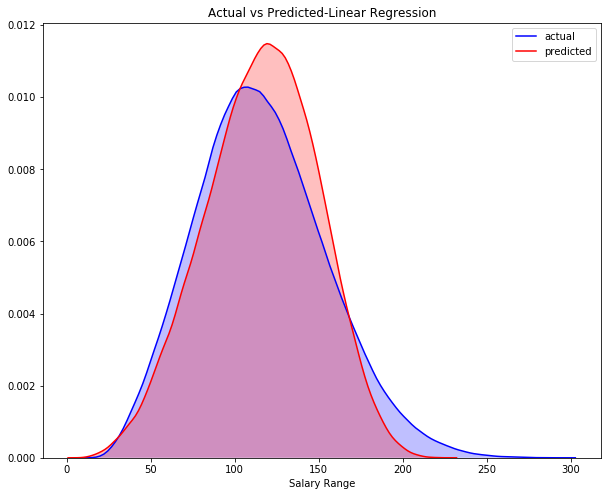

In [56]:
#checking how well the linear regression model predicts the salary 
fig = plt.figure(figsize=(10,8))
ax1 = sns.distplot(y_test,hist=False,color='b',label='actual',kde_kws={"shade": True})
sns.distplot(lr1.predict(x_test),hist=False,color='r',label='predicted',kde_kws={"shade": True})

plt.title('Actual vs Predicted-Linear Regression')
plt.xlabel('Salary Range')

##We will try to improve our model and reduce the mean square error 

In [57]:
#ridge regression 
lr_ridge = Ridge()
lr_ridge.fit(x_train,y_train)

Ridge()

In [58]:
#calculating mse with ridge regression
mse_ridge = mean_squared_error(y_test,lr_ridge.predict(x_test))

In [59]:
#appending results
ridge_row = {'model':'Ridge Regression','mean_square_error': mse_ridge}
results = results.append(ridge_row, ignore_index=True)

In [60]:
results

,model,mean_square_error
0,Linear Regression,384.340904
1,Ridge Regression,384.341017


In [62]:
ridge_r2 = sk.metrics.r2_score(y_test, lr_ridge.predict(x_test))
print("The r2 for Linear Regression model is:",np.round(ridge_r2,3))

The r2 for Linear Regression model is: 0.743


MSE of Linear regression and ridge regression are almost similar. 

We will try Random Forest model and see how it predicts the salaries.

# RANDOM FOREST

In [63]:
#calculating the cross val score of random forest
rf = RandomForestRegressor(n_estimators=170, n_jobs=2, max_depth=30, 
                           min_samples_split=60, max_features='auto', verbose=0)
                          
neg_mse= cross_val_score(rf,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
rf_mse = -1.0*np.mean(neg_mse)  

In [64]:
#appending the results 
rforest_row = {'model':'Random Forest','mean_square_error': rf_mse}
results = results.append(rforest_row, ignore_index=True)

In [65]:
results

,model,mean_square_error
0,Linear Regression,384.340904
1,Ridge Regression,384.341017
2,Random Forest,377.515104


Random forest did not reduce the mean square error as observed. 



# Gradient Boosting

In [66]:
gbr = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)
neg_mse_gbr = cross_val_score(gbr,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
gbr_mse = -1.0*np.mean(neg_mse_gbr)

In [67]:
#fitting the gradient boosting model to compare the results
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=160)

In [68]:
#appending the results 
Boost_row = {'model':'Gradient Boosting','mean_square_error': gbr_mse}
results = results.append(Boost_row, ignore_index=True)

Text(0.5, 0, 'Salary Range')

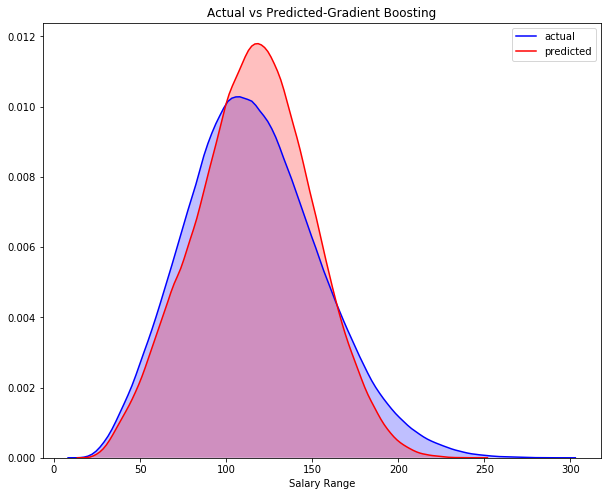

In [69]:
#checking how well the GradientBoosting model predicts the salary 
fig = plt.figure(figsize=(10,8))
ax1 = sns.distplot(y_test,hist=False,color='b',label='actual',kde_kws={"shade": True})
sns.distplot(gbr.predict(x_test),hist=False,color='r',label='predicted',kde_kws={"shade": True})
plt.title('Actual vs Predicted-Gradient Boosting')
plt.xlabel('Salary Range')

In [70]:
results

,model,mean_square_error
0,Linear Regression,384.340904
1,Ridge Regression,384.341017
2,Random Forest,377.515104
3,Gradient Boosting,359.685955


### ---- 7 Select best model  ----

In [71]:
#The model which gives us the least mean square error is the best model 
print("The best model is: ")
results.min()

The best model is: 


model                Gradient Boosting
mean_square_error              359.686
dtype: object

Gradient Boosting is the best model as the mean square error is 359

## Part 4 - DEPLOY

In [72]:
test_f = test_features.copy()

In [73]:
#Preparing the data for analysis, creating dummies for categorial variable and scaling nnumeric varibales
num_test = ['yearsExperience', 'milesFromMetropolis']
cat_test = ['jobType','degree', 'major','industry']

mms1 = MinMaxScaler()
cat_df = pd.get_dummies(test_f[cat_test], drop_first=True)
num_df = pd.DataFrame(mms1.fit_transform(test_f[num_test]))

test_final = pd.concat([cat_df,num_df], axis=1)
test_final.shape

(1000000, 27)

In [74]:
#Rename columns after scaling 
test_final= test_final.rename(columns={0:'milesFromMetropolis',1:'yearsExperience'})

In [75]:
test_final.head(2)

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,...,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,milesFromMetropolis,yearsExperience
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.916667,0.737374
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.833333,0.474747


In [76]:
#Predicting results
test_salary = pd.DataFrame(gbr.predict(test_final))

In [77]:
prediction_df=pd.concat([test_features['jobId'],test_salary ],axis=1)

In [78]:
prediction_df.head(5)

,jobId,0
0,JOB1362685407687,113.695549
1,JOB1362685407688,94.655870
2,JOB1362685407689,176.328297
3,JOB1362685407690,105.017116
4,JOB1362685407691,118.102790


In [79]:
#Saving the results to csv
prediction_df.to_csv('predicted_salaries.csv')

# FEATURE IMPORTANCE

In [80]:
importance = gbr.feature_importances_

In [81]:
feature_importance = pd.DataFrame({'Feature':test_final.columns, "Importance" : importance})

In [82]:
#Sorting values by ascending values
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.set_index('Feature', inplace=True, drop=True)

Text(0.5, 1.0, 'FEATURE IMPORTANCE PLOT')

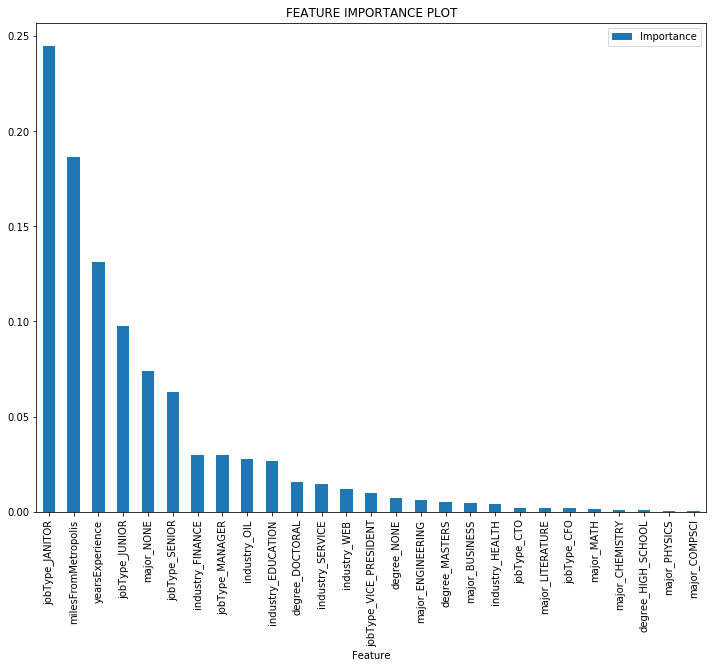

In [83]:
fig = feature_importance.plot.bar(figsize=(12,9))
fig.set_title('FEATURE IMPORTANCE PLOT')